In [1]:
import pandas as pd

# Reading in the data
df = pd.read_csv('datasets/cookie_cats.csv')

# Showing the first few rows
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [2]:
# Counting the number of players in each AB group.
df.groupby(by='version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Text(0, 0.5, 'user')

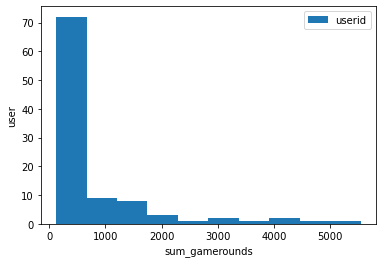

In [3]:
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby(by='sum_gamerounds').count().head(100)

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.reset_index().plot(x='sum_gamerounds', y='userid',kind='hist')
ax.set_xlabel("sum_gamerounds")
ax.set_ylabel("user")

In [4]:
# The % of users that came back the day after they installed
df['retention_1'].mean()

0.4452095044850259

In [5]:
# Calculating 1-day retention for each AB-group
df.groupby(by='version').mean()['retention_1']

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

<AxesSubplot:ylabel='Density'>

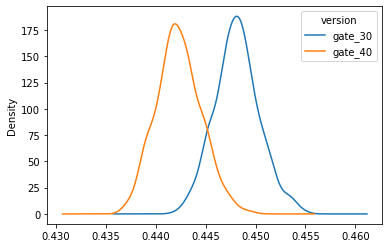

In [6]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
iterations=500
for i in range(iterations):
    boot_mean = df.sample(frac=1,replace=True).groupby(by='version').mean()['retention_1']
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.head(10)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot.kde()

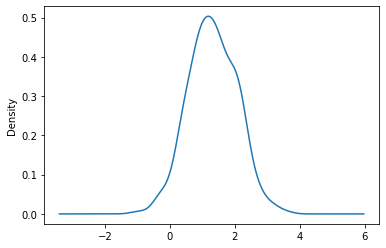

In [7]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = ((boot_1d['gate_30']-boot_1d['gate_40'])/boot_1d['gate_40'])*100.0

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot.kde()

In [8]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob =( boot_1d['diff']>0).mean()

# Pretty printing the probability
print('the probability that difference is above zero is {}%'.format(prob*100.0))

the probability that difference is above zero is 96.6%


In [9]:
# Calculating 7-day retention for both AB-groups
df.groupby(by='version').mean()['retention_7']

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

the probability that difference is below zero is 100.0%


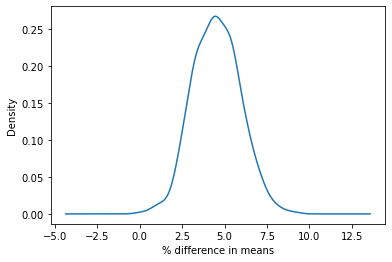

In [10]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby(by='version').mean()['retention_7']
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] =  ((boot_7d['gate_30']-boot_7d['gate_40'])/boot_7d['gate_40'])*100.0

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = prob =( boot_7d['diff']>0).mean()

print('the probability that difference is below zero is {}%'.format(prob*100))

In [11]:
move_to_level_40 = False